Numerical integration of the similarity equations for the collapse of an isothermal sphere.

## Required dependencies

We load `numpy`, `scipy.integrate.solve_ivp` to solve an initial value problem for our system of ODEs, and `matplotlib` for plotting the solutions.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot

## System of equations

We want to solve for $\alpha(x)$, $\beta(x)$ given:

$\left [ (x-\beta)^2-1 \right]  \frac{1}{\alpha} \frac{\partial \alpha}{\partial x} = \left[  \alpha  -  \frac{2}{x} (x-\beta) \right]  (x-\beta)$

$\left [ (x-\beta)^2 -1 \right] \frac{\partial \beta}{\partial x} = \left[  \alpha  (x-\beta)  -  \frac{2}{x} \right] (x-\beta)$

Let $\alpha = y_1$, $\beta = y_2$.  Then we have

$y_1'=\frac{y_1}{[(x-y_2)^2-1]}[y_1-\frac{2}{x}(x-y_2)](x-y_2)$

$y2'=\frac{1}{[(x-y_2)^2-1]}[y_1(x-y_2)-\frac{2}{x}](x-y_2)$

Now implementing the differential functions.  Here $y$ is an array of the two functions $[y_1, y_2]$ and the function returns the two derivatives, $[y_1',y_2']$.

In [2]:
def collapse(x, y):
  xmb=x-y[1]
  y1p=y[0]/(xmb**2-1)*(y[0]-2./x*xmb)*xmb
  y2p=1./(xmb**2-1)*(y[0]*xmb-2./x)*xmb
  return np.vstack((y1p, y2p))


## Initial conditions

Set up the initial conditions.  From Shu 1977 (SELF-SIMILAR COLLAPSE OF ISOTHERMAL SPHERES AND STAR FORMATION), at large $x$ the solutions should asymptote to $\alpha=A/x^2$, $\beta=-(A-2)/x$, $m=Ax$ for $A>2$.

In [3]:
A=2.2
x0=10.
a0=A/x0**2
b0=-(A-2)/x0


## Run the solver

Call the solve_ivp function to solve the system of ODEs, and check it converged.  Give it the interval over which to solve (running backwards, from large $x$ to small); initial values; and (optionally) the times to store the solution at in t_eval.  Status=0 means success.

In [4]:
res=solve_ivp(collapse, (x0, 0.01), [a0, b0], vectorized=True, method='RK45', t_eval=np.logspace(-2, np.log10(x0), 200)[::-1])
print(res.status)


0


## Plot the solutions

$\alpha$ and $\beta$ have already been evaluated on the grid requested and are stored in `res`.  Also calculate $m = x^2 \alpha (x - \beta)$.

For comparison also plot the isothermal sphere solutions at large $x$ and asymptotic solutions at small $x$.

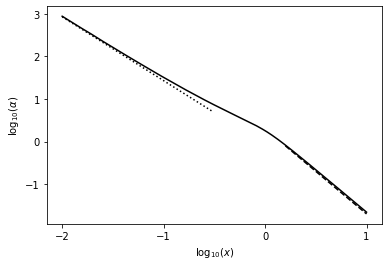

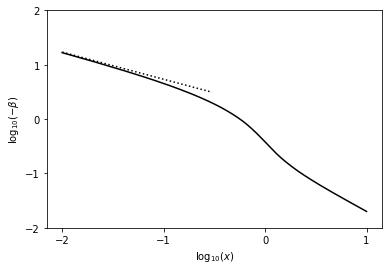

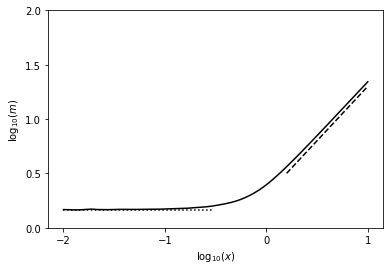

In [6]:
# Overall solutions from solver
x_plot=res.t[::-1]
alpha_plot=res.y[0][::-1]
beta_plot=res.y[1][::-1]
m_plot=x_plot**2*alpha_plot*(x_plot-beta_plot)

# Isothermal sphere solutions
x_iso=np.logspace(0.2, np.log10(np.max(x_plot)), 100)
alpha_iso=2/x_iso**2
m_iso=2*x_iso

# Small-x asymptotic solutions
m0=np.min(m_plot)
x_sm=np.logspace(np.log10(np.min(x_plot)), np.log10(0.3), 100)
beta_sm=-np.sqrt(2*m0/x_sm)
alpha_sm=np.sqrt(m0/2/x_sm**3)

pyplot.plot(np.log10(x_plot), np.log10(alpha_plot), 'k')
pyplot.plot(np.log10(x_iso), np.log10(alpha_iso), 'k--')
pyplot.plot(np.log10(x_sm), np.log10(alpha_sm), 'k:')
pyplot.xlabel(r'$\log_{10}(x)$')
pyplot.ylabel(r'$\log_{10}(\alpha)$')
pyplot.gca().set_xticks(np.arange(-2, 1.1, 1))
pyplot.show()

pyplot.figure()
pyplot.plot(np.log10(x_plot), np.log10(-beta_plot), 'k')
pyplot.plot(np.log10(x_sm), np.log10(-beta_sm), 'k:')
pyplot.xlabel(r'$\log_{10}(x)$')
pyplot.ylabel(r'$\log_{10}(-\beta)$')
pyplot.gca().set_xticks(np.arange(-2, 1.1, 1))
pyplot.gca().set_yticks(np.arange(-2, 2.1, 1))
pyplot.show()

pyplot.figure()
pyplot.plot(np.log10(x_plot), np.log10(m_plot), 'k')
pyplot.plot(np.log10(x_iso), np.log10(m_iso), 'k--')
pyplot.plot(np.log10(x_sm), np.log10(m0)*np.ones_like(x_sm), 'k:')
pyplot.xlabel(r'$\log_{10}(x)$')
pyplot.ylabel(r'$\log_{10}(m)$')
pyplot.gca().set_xticks(np.arange(-2, 1.1, 1))
pyplot.gca().set_yticks(np.arange(0, 2.1, 0.5))
pyplot.show()



_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys417/collapse.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys417/collapse.py)._